**Instalação de dependências**

In [1]:
!pip install seaborn==0.9.0
import pandas as pd
from google.colab import files

from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler
import seaborn as sns
from sklearn.metrics import pairwise_distances_argmin
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()  # for plot styling
import numpy as np

**Upload do CSV (Tabela 4)**

In [2]:
tabela4Uploaded = files.upload()

**Importação dos arquivos CSV na biblioteca do Pandas**

In [0]:
tabela4 = pd.read_csv("tabela4.csv", sep=";", header=0, decimal=',', names=["Trechos", "ATR (mm)", "N", "FN", "Espessura total do revestimento (cm)", "Tempo de solicitação (meses)", "Região", "Temperatura média do ar (grau C)"])

**Funções auxiliares**

In [0]:
def calculaRazao(atr,n):
  return atr/n

In [0]:
def obtemCriterio(fn):
  if fn>100 and fn<=300:
    return 'Médio'
  elif fn>300 and fn<=1000:
    return 'Pesado'
  elif fn>1000:
    return 'Extremamente Pesado'
  else:
    return 'Leve'

In [0]:
def obtemCriterioAtrN(atrN):
  if atrN<3000000:
    return 'Leve'
  elif atrN>10000000 and atrN<=30000000:
    return 'Leve|Médio|Pesado'
  elif atrN>30000000:
    return 'Leve|Médio|Pesado|Extremamente Pesado'
  else:
    return 'Leve|Médio'

In [0]:
tabela4["ATR/N"] = tabela4.apply(lambda x: calculaRazao(x['ATR (mm)'], x['N']), axis=1)
#tabela4["criterio"] = tabela4["FN"].apply(obtemCriterio)
tabela4["criterio_n"] = tabela4["N"].apply(obtemCriterioAtrN)

**Exibição da Tabela**

In [8]:
tabela4

,Trechos,ATR (mm),N,FN,Espessura total do revestimento (cm),Tempo de solicitação (meses),Região,Temperatura média do ar (grau C),ATR/N,criterio_n
0,T1,4.1,1500000,158,6,31,Sul,19.3,2.733333e-06,Leve
1,T2,1.5,570000,212,4,47,Sudeste,20.2,2.631579e-06,Leve
2,T3,2.5,1100000,497,10,37,Sul,19.3,2.272727e-06,Leve
3,T4,5.4,2400000,29,11,25,Nordeste,25.1,2.250000e-06,Leve
4,T5,0.7,570000,119,4,47,Sudeste,20.2,1.228070e-06,Leve
5,T6,0.2,240000,1318,10,22,Sul,21.7,8.333333e-07,Leve
6,T7,6.4,31000000,1487,8,36,Sul,18.9,2.064516e-07,Leve|Médio|Pesado|Extremamente Pesado
7,T8,5.6,29000000,354,15,26,Sul,19.1,1.931034e-07,Leve|Médio|Pesado
8,T9,1.6,11000000,4410,16,6,Sul,17.8,1.454545e-07,Leve|Médio|Pesado
9,T10,1.6,17000000,1214,12,14,Sudeste,18.5,9.411765e-08,Leve|Médio|Pesado


**Extraindo os dummies**

Cria uma nova tabela com os criterios (em colunas) para populá-los com dados binários a fim de identificar os trechos por critério. Este é um processo muito comum em ciência de dados quando se deseja clusterizar ou utilizar uma variável categórica.

In [9]:
criterio = tabela4.criterio_n.str.get_dummies()
criterio

,Extremamente Pesado,Leve,Médio,Pesado
0,0,1,0,0
1,0,1,0,0
2,0,1,0,0
3,0,1,0,0
4,0,1,0,0
5,0,1,0,0
6,1,1,1,1
7,0,1,1,1
8,0,1,1,1
9,0,1,1,1


**Concatenando a Tabela 4 (CSV) com os dummies**

In [10]:
dados_dos_trechos = pd.concat([tabela4,criterio], axis=1) # axis=1 indica que sera concatenado ao lado (na horizontal)
dados_dos_trechos

,Trechos,ATR (mm),N,FN,Espessura total do revestimento (cm),Tempo de solicitação (meses),Região,Temperatura média do ar (grau C),ATR/N,criterio_n,Extremamente Pesado,Leve,Médio,Pesado
0,T1,4.1,1500000,158,6,31,Sul,19.3,2.733333e-06,Leve,0,1,0,0
1,T2,1.5,570000,212,4,47,Sudeste,20.2,2.631579e-06,Leve,0,1,0,0
2,T3,2.5,1100000,497,10,37,Sul,19.3,2.272727e-06,Leve,0,1,0,0
3,T4,5.4,2400000,29,11,25,Nordeste,25.1,2.250000e-06,Leve,0,1,0,0
4,T5,0.7,570000,119,4,47,Sudeste,20.2,1.228070e-06,Leve,0,1,0,0
5,T6,0.2,240000,1318,10,22,Sul,21.7,8.333333e-07,Leve,0,1,0,0
6,T7,6.4,31000000,1487,8,36,Sul,18.9,2.064516e-07,Leve|Médio|Pesado|Extremamente Pesado,1,1,1,1
7,T8,5.6,29000000,354,15,26,Sul,19.1,1.931034e-07,Leve|Médio|Pesado,0,1,1,1
8,T9,1.6,11000000,4410,16,6,Sul,17.8,1.454545e-07,Leve|Médio|Pesado,0,1,1,1
9,T10,1.6,17000000,1214,12,14,Sudeste,18.5,9.411765e-08,Leve|Médio|Pesado,0,1,1,1


**Escalando os dados**

In [11]:
scaler = StandardScaler()
criterios_escalado = scaler.fit_transform(criterio)
criterios_escalado.shape

(12, 4)

**Agrupando os dados**

Coloca os itens parecidos nos mesmos grupos e itens diferentes em grupos diferentes

In [12]:
modelo = KMeans(n_clusters=3)
modelo.fit(criterios_escalado)

print("Grupos {}".format(modelo.labels_))

Grupos [1 1 1 1 1 1 0 2 2 2 2 2]


In [13]:
tsne = TSNE()
visualizacao = tsne.fit_transform(criterios_escalado)
visualizacao

array([[-369.65384 , -315.08713 ],
       [-469.85092 ,   66.678116],
       [ 394.1752  , -312.10074 ],
       [-371.86783 ,  448.74298 ],
       [-141.05576 ,  -85.05218 ],
       [ 492.16107 ,   69.94339 ],
       [  12.863115, -412.68066 ],
       [ 163.36833 ,  221.7139  ],
       [-141.75604 ,  220.07713 ],
       [ 392.0129  ,  451.6997  ],
       [   9.468625,  549.3347  ],
       [ 164.06708 ,  -83.41815 ]], dtype=float32)

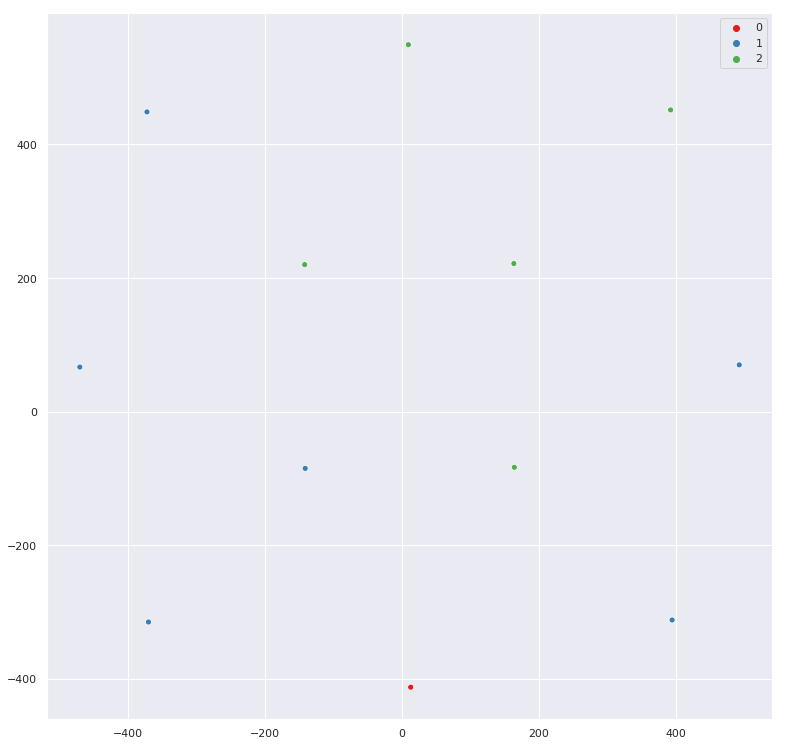

In [14]:
sns.set(rc={'figure.figsize': (13, 13)})

sns.scatterplot(x=visualizacao[:, 0],
               y=visualizacao[:, 1],
               hue=modelo.labels_,
               palette=sns.color_palette('Set1', 3))